In [79]:
# import numpy as np
# from tensorflow.keras.models import load_model
# import joblib

# model = load_model("pressure_ID_Fan_inlet_DL(1).h5")

# x = np.array(['18.51997', '60.93208', '946.2000', '226.4158', '945.4032']).astype(float)

# y = -400.0651

# scaler = joblib.load("scaler(1).pkl")

# x_scaled = scaler.transform(x.reshape(1, -1))

# pred = model.predict(x_scaled)

# print("Predicted value:", pred)


In [80]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

model = load_model("FDC_Outlet_Pressure_DL(4).h5")

In [81]:
df = pd.read_csv('Batch-1.2.csv')
df.shape

(1081, 25)

In [82]:
df = df.iloc[:,10:24]
df.drop(columns=['Unnamed: 19','Unnamed: 20'],inplace=True)
df.head()

,FDC Outlet Pressure,Pressure at Gas Mixter inlet,Temp at BagHouse Inlet - UpperSide,Temp at BagHouse Inlet - LowerSide,Pressure at BagHouse Inlet,DP Across baghouse - UpperSide,DP Across baghouse - LowerSide,Pressure ID Fan Inlet,Canopy Damper Position,ID Fan1 Speed,ID Fan1 Current,ID Fan2 Speed
0,-133.5070,-144.4444,60.5,59.3,-235.4167,15.30237,18.50550,-409.7946,65.75810,946.2,233.7217,945.4032
1,-139.3880,-147.9745,64.7,66.3,-237.7170,15.93895,18.97135,-418.0049,61.29015,946.2,232.6680,945.4032
2,-136.0243,-141.5509,72.8,75.7,-233.5504,15.53241,18.87008,-411.1328,61.29015,946.2,223.3247,945.4032
3,-130.5773,-137.9630,77.3,79.8,-226.3889,16.02720,19.27373,-409.4329,61.29015,946.2,224.9405,945.4032
4,-130.8377,-134.6209,76.3,79.8,-225.5425,16.51476,19.58767,-411.2775,61.29412,946.2,223.1140,945.4032


In [83]:
print(df.isna().sum())
df.dropna(inplace=True)

FDC Outlet Pressure                   0
Pressure at Gas Mixter inlet          0
Temp at BagHouse Inlet - UpperSide    0
Temp at BagHouse Inlet - LowerSide    0
Pressure at BagHouse Inlet            0
DP Across baghouse - UpperSide        0
DP Across baghouse - LowerSide        0
Pressure ID Fan Inlet                 0
Canopy Damper Position                0
ID Fan1 Speed                         0
ID Fan1 Current                       0
ID Fan2 Speed                         0
dtype: int64


In [84]:
x = df.drop('FDC Outlet Pressure',axis = 1)
y = df['FDC Outlet Pressure']
x = np.array(x)
x.shape

(1081, 11)

In [85]:
sc = joblib.load("scaler(4).pkl")
x_scaled = sc.transform(x)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [86]:
pred = model.predict(x_scaled)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [87]:
r2_score(y,pred)

0.9131109776259473

In [88]:
pred = pred.flatten()
pred.shape

(1081,)

In [89]:
diff = pred - (np.array(y)).reshape(1,-1)


In [90]:
print(diff[diff>20].size)
print(diff[diff>20])


4
[25.88234126 30.30319154 27.43655385 21.03225248]


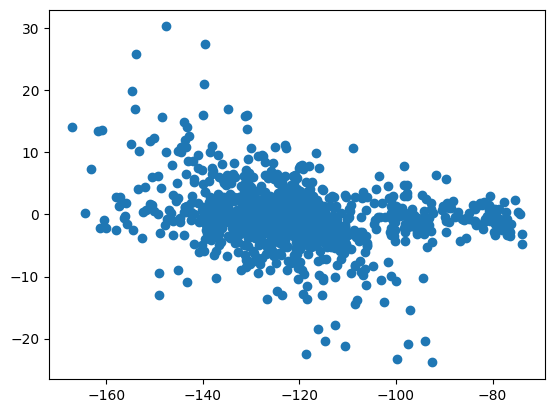

In [91]:
plt.scatter(y,diff)